In [69]:
import numpy as np

def calc_power(torque, rpm):
    return torque * rpm / 9.548

def calc_torque(force, radius):
    return force * radius

def calc_torque_from_power(power, rpm):
    return power * 9.548 / rpm

def calc_force(angle, mass):
    return mass * 9.81 * np.sin(angle)

def calc_wheel_rpm(velocity, wheel_radius):
    return velocity / (wheel_radius * 2 * np.pi) * 60

def calc_motor_rpm(wheel_rpm, gear_ratio):
    return wheel_rpm * gear_ratio

def calc_drag_force(velocity, drag_coefficient, frontal_area):
    return 0.5 * 1.225 * velocity**2 * drag_coefficient * frontal_area
    
def calculate_power_torque(wheel_radius, gear_ratio, velocity, hill_angle, motor_efficeincy, gearbox_efficiency, drag_coefficient, frontal_area, mass):
    force = calc_force(np.deg2rad(hill_angle), mass) + calc_drag_force(velocity, drag_coefficient, frontal_area)
    torque = calc_torque(force, wheel_radius)
    motor_torque = torque / gear_ratio
    wheel_rpm = calc_wheel_rpm(velocity, wheel_radius)
    motor_rpm = calc_motor_rpm(wheel_rpm, gear_ratio)
    motor_torque = torque / gear_ratio
    motor_power = calc_power(motor_torque, motor_rpm)/motor_efficeincy/gearbox_efficiency
    return motor_power, motor_torque, wheel_rpm, motor_rpm


Wheel rpm: 272.84 rpm
Motor rpm: 5456.74 rpm


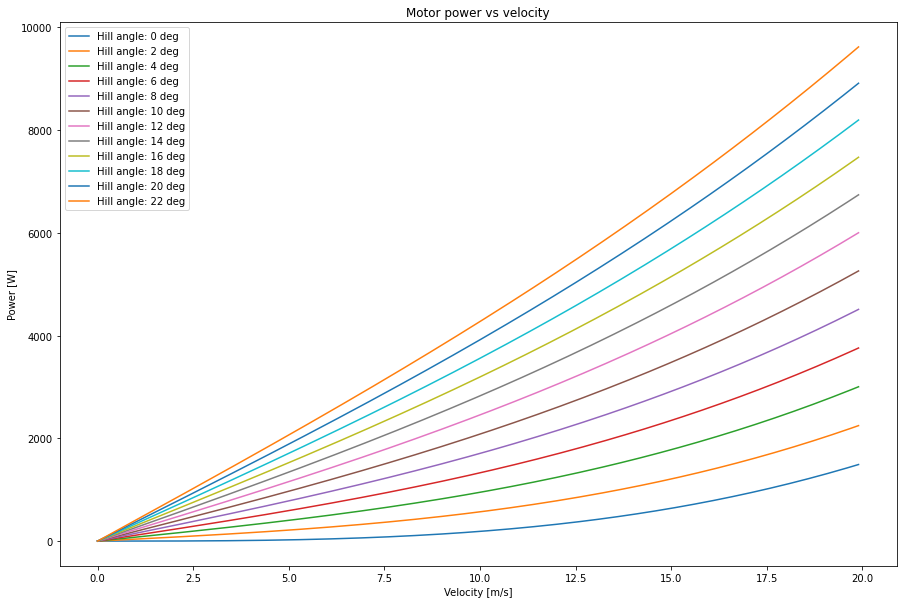

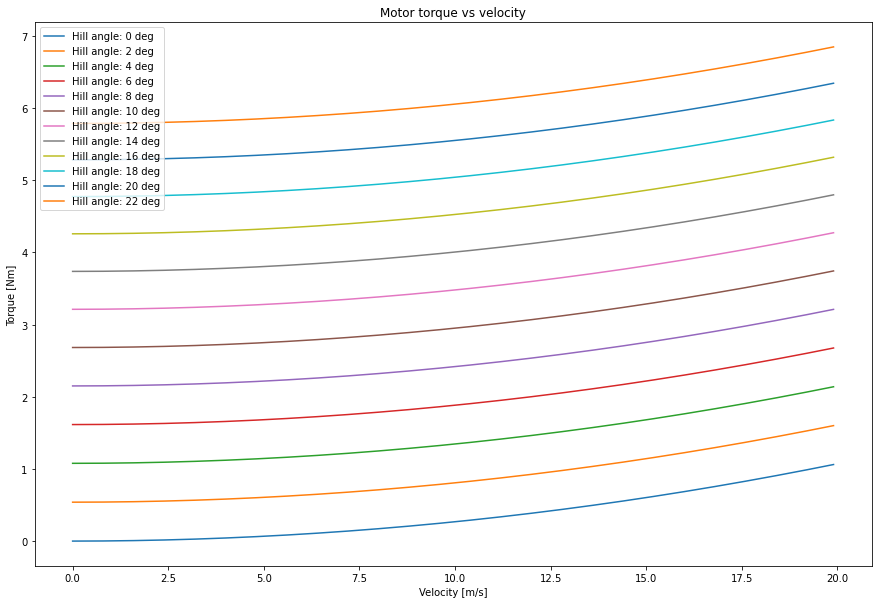

In [64]:
rider_weight = 80
bike_weight = 10
total_weight = rider_weight + bike_weight
wheel_radius = 0.35
gear_ratio = 20
velocity = 10
hill_angle = 0
motor_efficeincy = 0.9
gearbox_efficiency = 0.9
drag_coefficient = 0.5
frontal_area = 0.5



power, torque, wheel_rpm, motor_rpm = calculate_power_torque(wheel_radius, gear_ratio, velocity, hill_angle, motor_efficeincy, gearbox_efficiency, drag_coefficient, frontal_area, total_weight)

print("Wheel rpm: {:.2f} rpm".format(wheel_rpm))
print("Motor rpm: {:.2f} rpm".format(motor_rpm))
# print("Motor torque: {:.2f} Nm".format(torque))
# print("Motor power: {:.2f} W".format(power))


#plot motor power and torque vs velocity for different hill angles 0-20 degrees
for hill_angle in range(0, 24, 2):
    velocity = np.arange(0, 20, 0.1)
    power = np.zeros_like(velocity)
    torque = np.zeros_like(velocity)
    for i, v in enumerate(velocity):
        power[i], torque[i], _, _ = calculate_power_torque(wheel_radius, gear_ratio, v, hill_angle, motor_efficeincy, gearbox_efficiency, drag_coefficient, frontal_area, total_weight)
    import matplotlib.pyplot as plt
    plt.plot(velocity, power, label="Hill angle: {} deg".format(hill_angle))
    #add a legend
    plt.legend()
    plt.xlabel("Velocity [m/s]")
    plt.ylabel("Power [W]")
    plt.title("Motor power vs velocity")
    plt.grid()
    #set figure size
    plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

#plot motor power and torque vs velocity for different hill angles 0-20 degrees
for hill_angle in range(0, 24, 2):
    velocity = np.arange(0, 20, 0.1)
    power = np.zeros_like(velocity)
    torque = np.zeros_like(velocity)
    for i, v in enumerate(velocity):
        power[i], torque[i], _, _ = calculate_power_torque(wheel_radius, gear_ratio, v, hill_angle, motor_efficeincy, gearbox_efficiency, drag_coefficient, frontal_area, total_weight)
    import matplotlib.pyplot as plt
    plt.plot(velocity, torque, label="Hill angle: {} deg".format(hill_angle))
    #add a legend
    plt.legend()
    plt.xlabel("Velocity [m/s]")
    plt.ylabel("Torque [Nm]")
    plt.title("Motor torque vs velocity")
    plt.grid()
    #set figure size
    plt.rcParams["figure.figsize"] = (15, 10)





In [81]:
#create a sinusoid with 1 period given a max and min value 
def create_sinusoid(max_value, min_value, period, samples):
    #create a sinusoid with 1 period
    x = np.linspace(0, 2*np.pi, samples)
    y = (max_value - min_value)/2 * np.sin(x) + (max_value + min_value)/2
    return x, y

# #plot the sinusoid
# x, y = create_sinusoid(10, 0, 1, 100)
# plt.plot(x, y)
# plt.show()



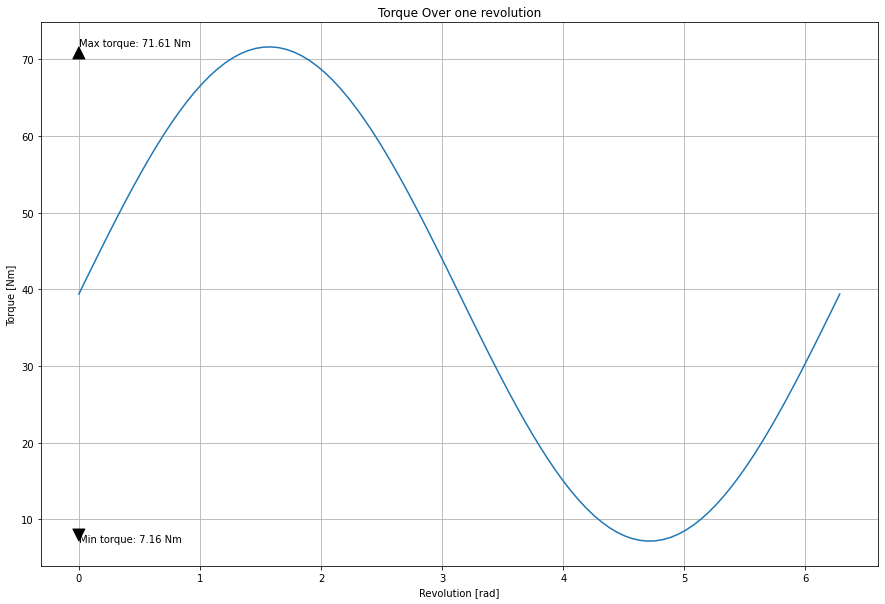

In [97]:
median_torque = calc_torque_from_power(300, 80)
min_torque = median_torque * 0.2
max_torque = median_torque * 2

#plot the sinusoid
x, y = create_sinusoid(max_torque, min_torque, 1, 100)
plt.plot(x, y)
#add labels
plt.xlabel("Revolution [rad]")
plt.ylabel("Torque [Nm]")
plt.title("Torque Over one revolution")
plt.grid()
#set figure size
plt.rcParams["figure.figsize"] = (15, 10)
#annotate the max and min torque values
plt.annotate("Max torque: {:.2f} Nm".format(max_torque), xy=(0, max_torque), xytext=(0, max_torque+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Min torque: {:.2f} Nm".format(min_torque), xy=(0, min_torque), xytext=(0, min_torque-0.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()



In [109]:
motor_voltage = 14*4
motor_kv = 149
motor_max_speed = motor_kv * motor_voltage

print("Motor max speed: {:.2f} rpm".format(motor_max_speed))

Motor max speed: 8344.00 rpm


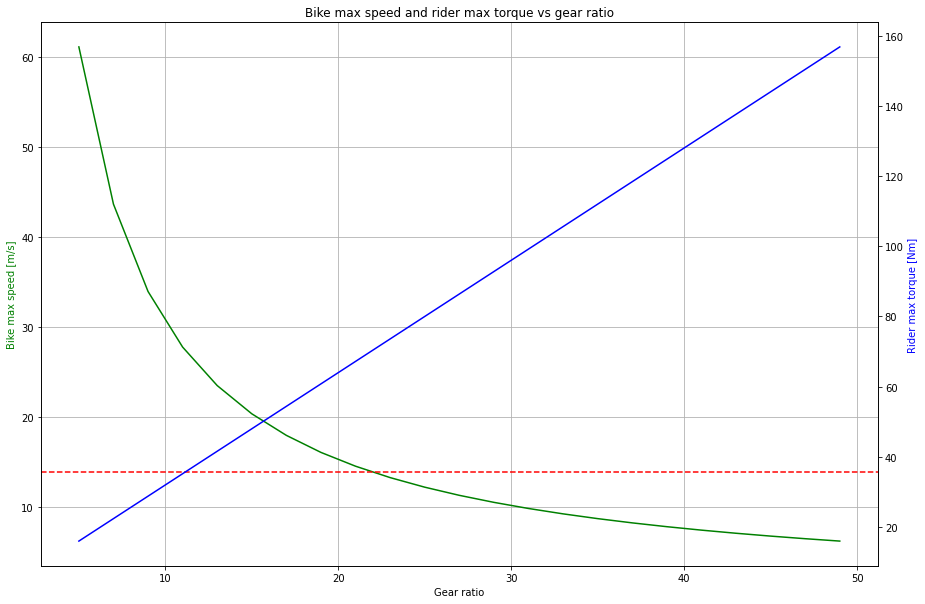

In [112]:
#plot motor max speed and torque for different gear ratios
motor_torque = 3.2

bike_max_speeds = []
max_rider_torques = []

for gear_ratio in range(5, 50, 2):
    #calculate the bike max speed given a motor max speed and gear ratio
    bike_max_speeds.append((motor_max_speed/60)/gear_ratio * 2*np.pi*wheel_radius)
    max_rider_torques.append(motor_torque * gear_ratio)

#plot the bike max speed and rider max torque, plot torque and speed on separate y axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(5, 50, 2), bike_max_speeds, 'g-')
ax2.plot(range(5, 50, 2), max_rider_torques, 'b-')
ax1.set_xlabel('Gear ratio')
ax1.set_ylabel('Bike max speed [m/s]', color='g')
ax2.set_ylabel('Rider max torque [Nm]', color='b')
#add a line at 50/3/6 m/s
ax1.axhline(y=50/3.6, color='r', linestyle='--')
#add plot title
plt.title("Bike max speed and rider max torque vs gear ratio")
#find the intersection of bike max speed and 
#add grid x and y axis 
ax1.grid()
ax2.grid()
plt.grid()
plt.show()



    